In [1]:
import os
import zipfile
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory


In [2]:
import os
import shutil

# Move to kaggle folder
os.makedirs("/root/.kaggle", exist_ok=True)
shutil.move("kaggle.json", "/root/.kaggle/kaggle.json")

# Set permissions
os.chmod("/root/.kaggle/kaggle.json", 600)



In [3]:
!kaggle datasets download -d fatemehmehrparvar/lung-disease



Dataset URL: https://www.kaggle.com/datasets/fatemehmehrparvar/lung-disease
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/34.9M [00:00<?, ?B/s]
100% 34.9M/34.9M [00:00<00:00, 1.33GB/s]


In [4]:
import zipfile

with zipfile.ZipFile("lung-disease.zip", 'r') as zip_ref:
    zip_ref.extractall("lung_disease_data")

print("✅ Dataset unzipped.")


✅ Dataset unzipped.


In [5]:
import os

for root, dirs, files in os.walk("lung_disease_data"):
    print("Root:", root)
    print("Subdirectories:", dirs)
    break


Root: lung_disease_data
Subdirectories: ['Lung X-Ray Image']


In [6]:
dataset_path = "lung_disease_data/Lung X-Ray Image/Lung X-Ray Image"


In [7]:
img_size = (224, 224)
batch_size = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=img_size,
    batch_size=batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=img_size,
    batch_size=batch_size
)


Found 3475 files belonging to 3 classes.
Using 2780 files for training.
Found 3475 files belonging to 3 classes.
Using 695 files for validation.


In [8]:
class_names = train_ds.class_names
print("Class Labels:", class_names)


Class Labels: ['Lung_Opacity', 'Normal', 'Viral Pneumonia']


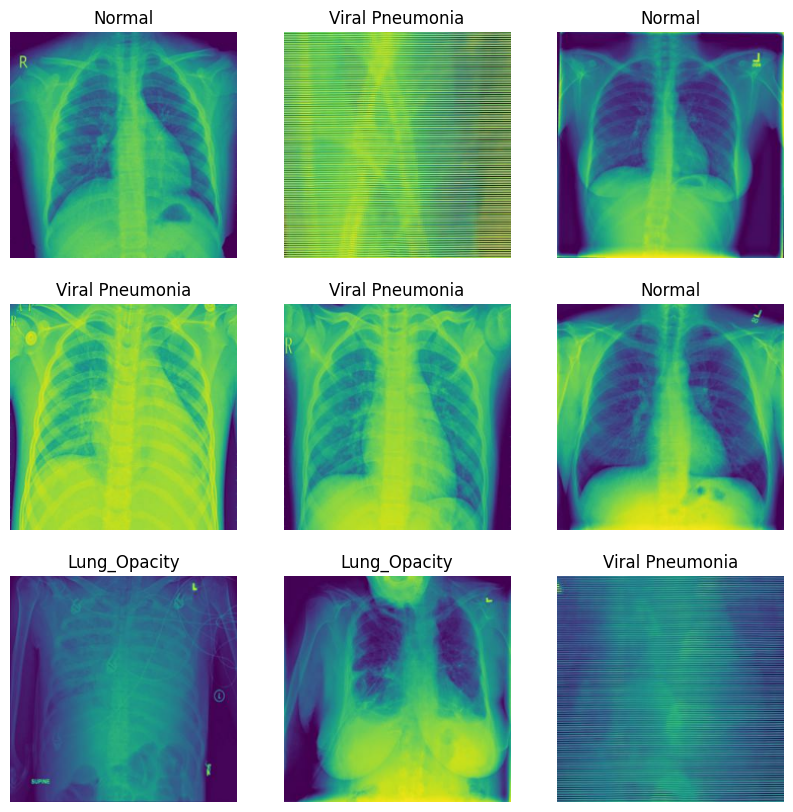

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")


In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.callbacks import EarlyStopping


In [17]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 30
LEARNING_RATE = 1e-4



In [18]:
dataset_path = "lung_disease_data/Lung X-Ray Image/Lung X-Ray Image"

train_ds = image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

val_ds = image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

class_names = train_ds.class_names


Found 3475 files belonging to 3 classes.
Using 2780 files for training.
Found 3475 files belonging to 3 classes.
Using 695 files for validation.


In [19]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.15),
    tf.keras.layers.RandomZoom(0.2),
])


In [20]:
model = Sequential([
    data_augmentation,

    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(class_names), activation='softmax')
])


In [21]:
model.compile(
    optimizer=Adam(learning_rate=LEARNING_RATE),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [22]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [23]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    callbacks=[early_stop]
)


Epoch 1/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 20s 139ms/step - accuracy: 0.6661 - loss: 1.4230 - val_accuracy: 0.5914 - val_loss: 0.8466
Epoch 2/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 15s 122ms/step - accuracy: 0.7501 - loss: 0.6380 - val_accuracy: 0.6158 - val_loss: 0.7235
Epoch 3/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 11s 122ms/step - accuracy: 0.7894 - loss: 0.5649 - val_accuracy: 0.7324 - val_loss: 0.5995
Epoch 4/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 21s 124ms/step - accuracy: 0.7849 - loss: 0.5166 - val_accuracy: 0.7482 - val_loss: 0.5357
Epoch 5/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 20s 121ms/step - accuracy: 0.7930 - loss: 0.5157 - val_accuracy: 0.8058 - val_loss: 0.4554
Epoch 6/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 10s 120ms/step - accuracy: 0.8004 - loss: 0.4873 - val_accuracy: 0.7827 - val_loss: 0.4741
Epoch 7/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 21s 121ms/step - accuracy: 0.8083 - loss: 0.4757 - val_accuracy: 0.7885 - val_loss: 0.5142
Epoch 8/30
87/87 ━━━━━━━━━━━━━━━━━━━━ 21s 129ms/step - accuracy: 0.8031 - loss: 0.4624 - val_accu

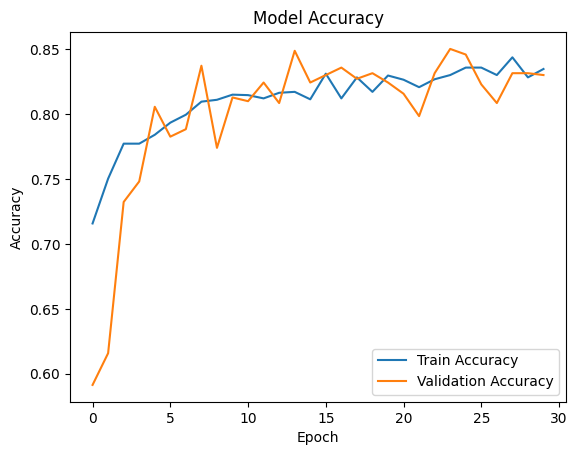

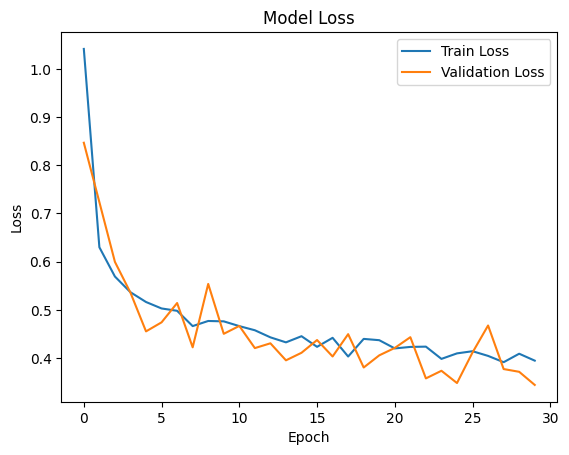

In [24]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [25]:
import numpy as np

y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

y_true = np.array(y_true)
y_pred = np.array(y_pred)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


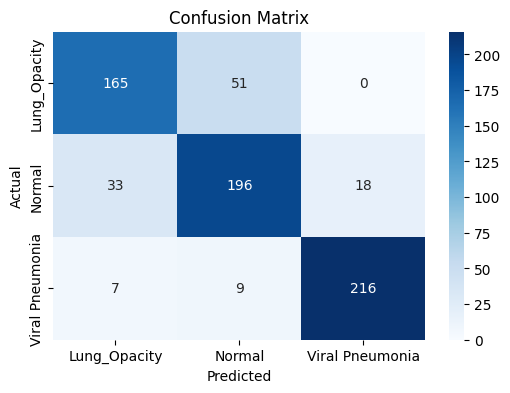

In [55]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [54]:
from sklearn.metrics import classification_report

print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))


Classification Report:
                 precision    recall  f1-score   support

   Lung_Opacity       0.80      0.76      0.78       216
         Normal       0.77      0.79      0.78       247
Viral Pneumonia       0.92      0.93      0.93       232

       accuracy                           0.83       695
      macro avg       0.83      0.83      0.83       695
   weighted avg       0.83      0.83      0.83       695



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


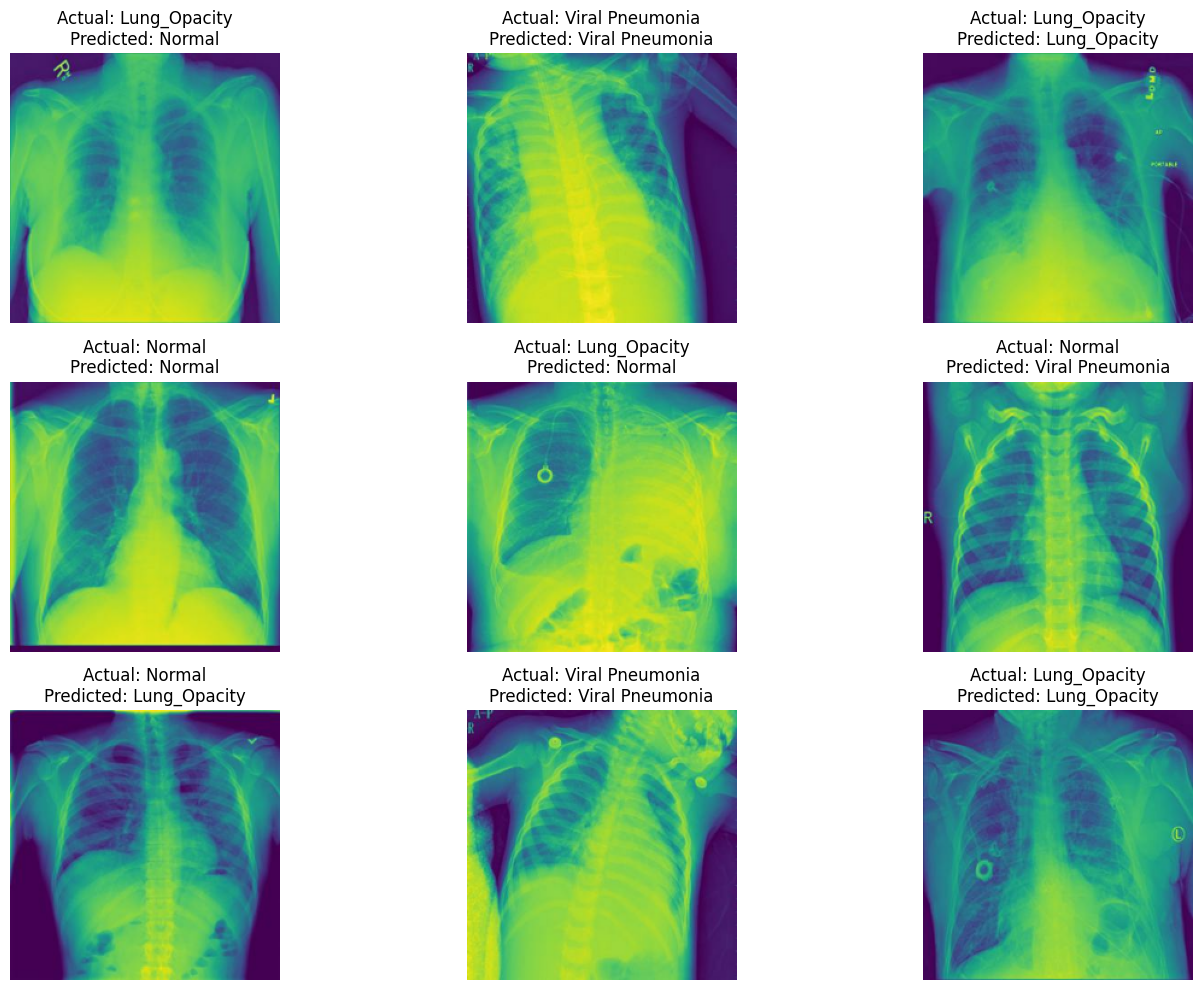

In [57]:
import matplotlib.pyplot as plt
import numpy as np

# Get a batch from validation dataset
for images, labels in val_ds.take(1):
    predictions = model.predict(images)
    predicted_classes = np.argmax(predictions, axis=1)
    true_classes = labels.numpy()

    # Plot 9 random images
    plt.figure(figsize=(15, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        actual_label = class_names[true_classes[i]]
        predicted_label = class_names[predicted_classes[i]]
        plt.title(f"Actual: {actual_label}\nPredicted: {predicted_label}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()
    break
